In [1]:
# import all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset from csv file

df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
# drop id column because it has no pattern

df.drop('id', axis= 1, inplace = True)

In [4]:
df.shape

(400, 25)

In [5]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [6]:
# rename column names for better understanding

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [7]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

There are few columns with wrong data types like packed_cell_volume, white_blood_cell_count and red_blood_cell_count should be numeric but here it is object

In [10]:
df[['packed_cell_volume','white_blood_cell_count','red_blood_cell_count']].sample(5)

,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
360,43,5800,6.2
348,44,7300,6.4
285,41,5300,5.9
207,41,10400,4.6
82,NaN,NaN,NaN


In [11]:
df['packed_cell_volume'].isna().sum()

np.int64(70)

due to null values present in data we cannot convert it using .astype(int) it will give an error

In [12]:
# Correcting wrong data types from object to numerical

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors= 'coerce') # error =  'coerce' will suppress all the errors
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors= 'coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors= 'coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [14]:
# group the columns into categorical and numerical

cat_col = [col for col in df.columns if df[col].dtype == "object"]
num_col = [col for col in df.columns if df[col].dtype != "object"]

print(f"cat_col = {cat_col}")
print(f"num_col = {num_col}")

cat_col = ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']
num_col = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


In [15]:
# checking all unique values in all categorical columns

for col in cat_col:
    print(f"{col} has {df[col].unique()} values \n")

red_blood_cells has [nan 'normal' 'abnormal'] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

hypertension has ['yes' 'no' nan] values 

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 

coronary_artery_disease has ['no' 'yes' '\tno' nan] values 

appetite has ['good' 'poor' nan] values 

peda_edema has ['no' 'yes' nan] values 

aanemia has ['no' 'yes' nan] values 

class has ['ckd' 'ckd\t' 'notckd'] values 



#diabetes_mellitus, coronary_artery_disease, and class columns has unwanted values in data

In [16]:
# replace unwanted values

df['diabetes_mellitus'].replace(to_replace={' yes': 'yes', '\tyes' : 'yes', '\tno' : 'no'}, inplace = True)

df['coronary_artery_disease'].replace(to_replace= '\tno' , value = 'no', inplace = True)

df['class'].replace(to_replace= 'ckd\t' , value = 'ckd', inplace = True)

In [17]:
# checking all unique values in all categorical columns

for col in cat_col:
    print(f"{col} has {df[col].unique()} values \n")

red_blood_cells has [nan 'normal' 'abnormal'] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

hypertension has ['yes' 'no' nan] values 

diabetes_mellitus has ['yes' 'no' nan] values 

coronary_artery_disease has ['no' 'yes' nan] values 

appetite has ['good' 'poor' nan] values 

peda_edema has ['no' 'yes' nan] values 

aanemia has ['no' 'yes' nan] values 

class has ['ckd' 'notckd'] values 



# Univariate Analysis

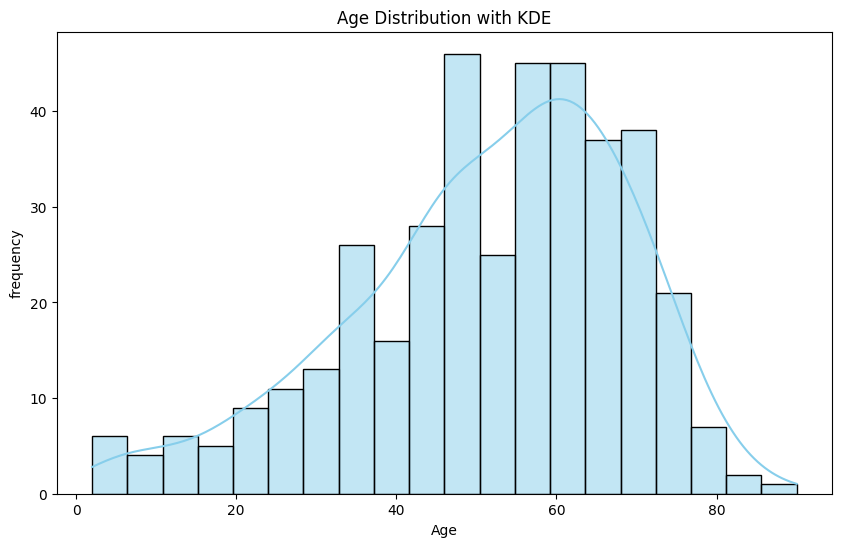

In [18]:
# Age Distribution with KDE
plt.figure(figsize=(10,6))
sns.histplot(df['age'].dropna(), kde= True, bins = 20, color= 'skyblue')
plt.title("Age Distribution with KDE")
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()

Insights>> dist of age is right skewed  
the median age is more then the mean    
there might be some outliers

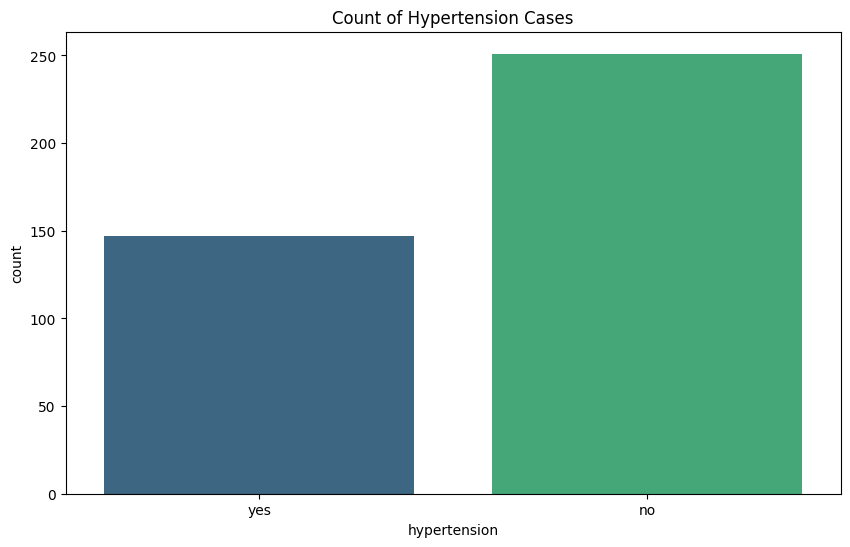

In [19]:
# Count of Hypertension Cases

plt.figure(figsize=(10,6))
sns.countplot(x = 'hypertension', data = df, palette='viridis')
plt.title('Count of Hypertension Cases')
plt.xlabel('hypertension')
plt.ylabel('count')
plt.show()

insights>> 150 of them have hypertension

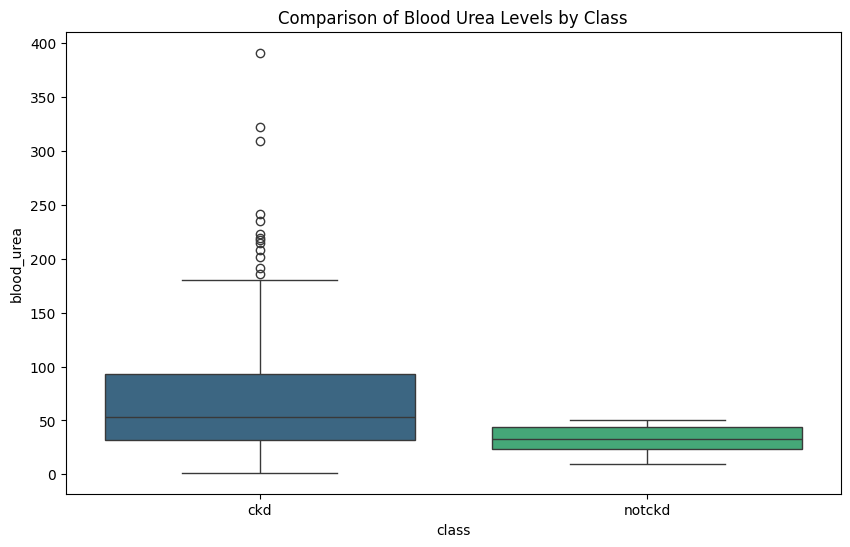

In [20]:
# Comparison of Blood Urea Levels by Class

plt.figure(figsize=(10,6))
sns.boxplot(x= 'class',y= 'blood_urea', data = df, palette='viridis')
plt.title("Comparison of Blood Urea Levels by Class")
plt.xlabel('class')
plt.ylabel('blood_urea')
plt.show()

insights >> outliers are present for ckd    
median value for ckd has high blood_urea than non ckd   
people with high blood urea might have higher chances of getting chronic disease

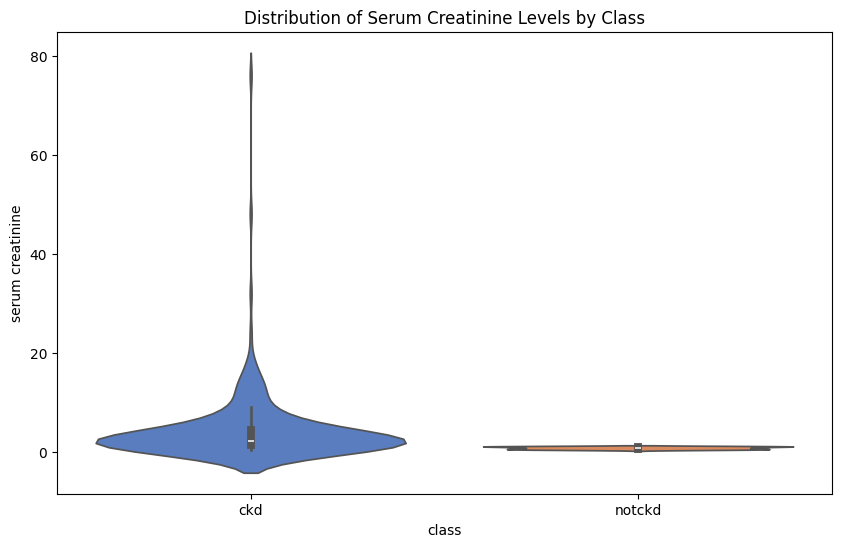

In [21]:
# "Distribution of Serum Creatinine Levels by Class"

plt.figure(figsize=(10,6))
sns.violinplot(x = 'class', y= 'serum_creatinine', data= df, palette = 'muted')
plt.title("Distribution of Serum Creatinine Levels by Class")
plt.xlabel('class')
plt.ylabel('serum creatinine')
plt.show()

insights >> outliers are present for ckd

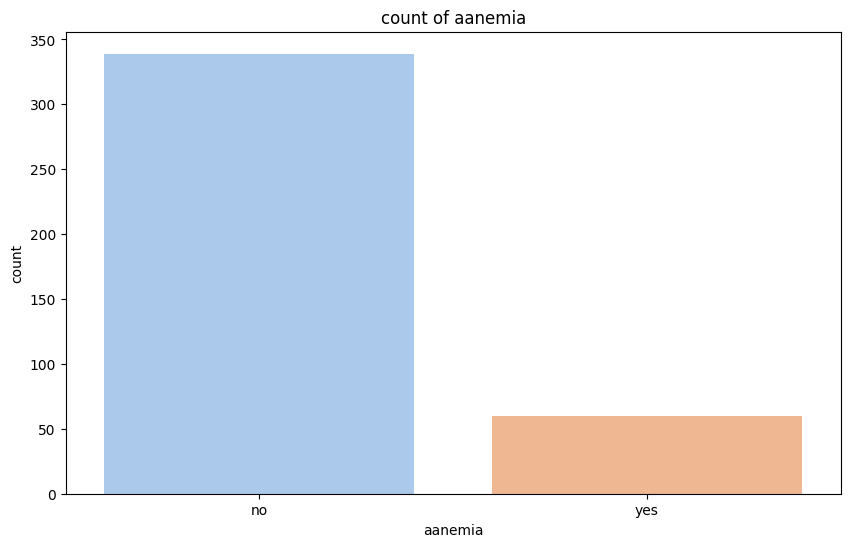

In [22]:
# Countplot of aanemia

plt.figure(figsize=(10,6))
sns.countplot(x = "aanemia", data= df, palette='pastel')
plt.title('count of aanemia')
plt.xlabel('aanemia')
plt.ylabel('count')
plt.show()

insights >> around 50 people has aanemia

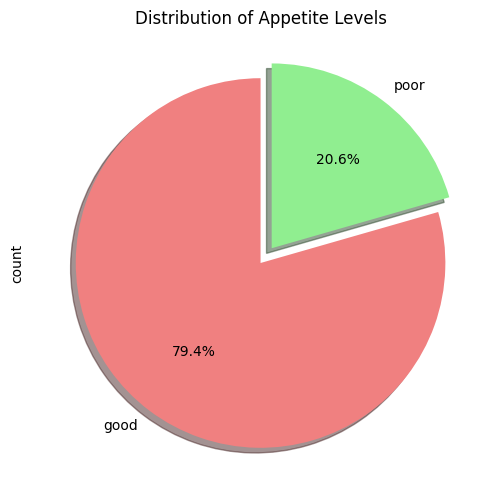

In [23]:
# Distribution of Appetite Levels

plt.figure(figsize=(10,6))
df.appetite.value_counts().plot.pie(autopct = '%1.1f%%', colors = ['lightcoral', 'lightgreen'], explode= (0,0.1), startangle = 90, shadow = True)
plt.title("Distribution of Appetite Levels")
plt.show()

insights >> 20.6% people has poor Levels

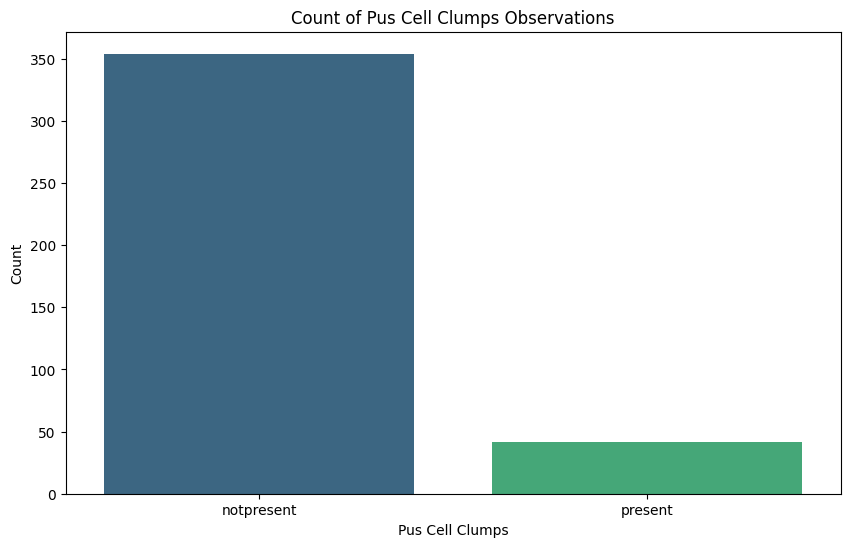

In [24]:
# Count of Pus Cell Clumps Observations

plt.figure(figsize=(10,6))
sns.countplot(x = 'pus_cell_clumps', data = df, palette='viridis')
plt.title("Count of Pus Cell Clumps Observations")
plt.xlabel('Pus Cell Clumps')
plt.ylabel('Count')
plt.show()

insights >> Pus Cell Clumps are present in 30-40 peoples

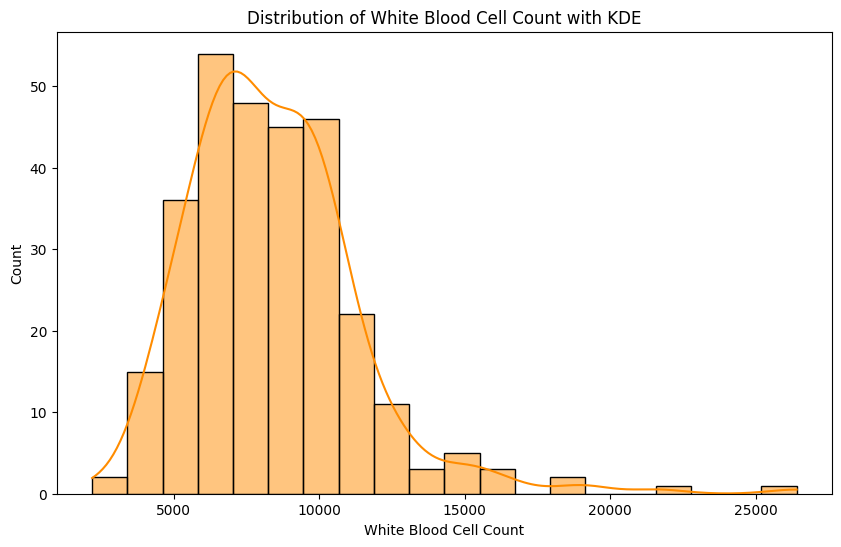

In [25]:
#  Distribution of White Blood Cell Count with KDE

plt.figure(figsize=(10,6))
sns.histplot(df['white_blood_cell_count'].dropna(), bins= 20, kde= True, color = 'darkorange')
plt.title("Distribution of White Blood Cell Count with KDE")
plt.xlabel('White Blood Cell Count')
plt.ylabel('Count')
plt.show()

Insights>> dist of White Blood Cell Count is left skewed  
the median White Blood Cell Count is less then the mean    
outliers are present in this data

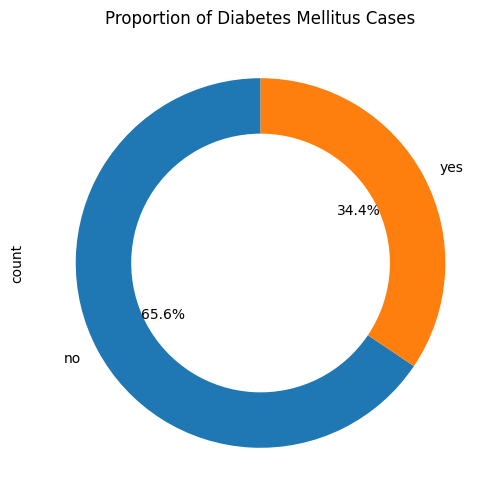

In [26]:
#  Proportion of Diabetes Mellitus Cases

plt.figure(figsize=(10,6))
df['diabetes_mellitus'].value_counts().plot.pie(autopct = "%1.1f%%", wedgeprops= dict(width = 0.3), startangle= 90)
plt.title("Proportion of Diabetes Mellitus Cases")
plt.show()

insights >> 34.4% people has Diabetes Mellitus Cases

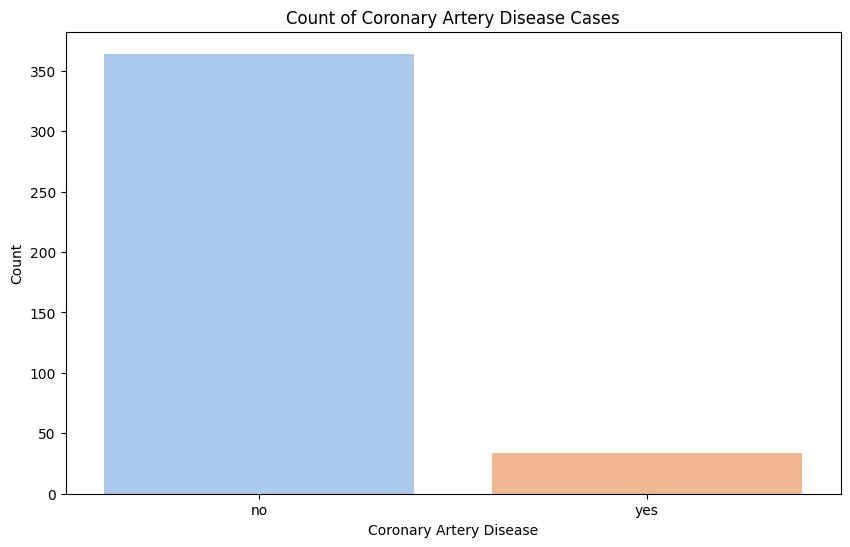

In [27]:
# Count of Coronary Artery Disease Cases

plt.figure(figsize=(10,6))
sns.countplot(x='coronary_artery_disease', data=df, palette='pastel')
plt.title("Count of Coronary Artery Disease Cases")
plt.xlabel('Coronary Artery Disease')
plt.ylabel('Count')
plt.show()

insights >> around 40 people has Coronary Artery Disease

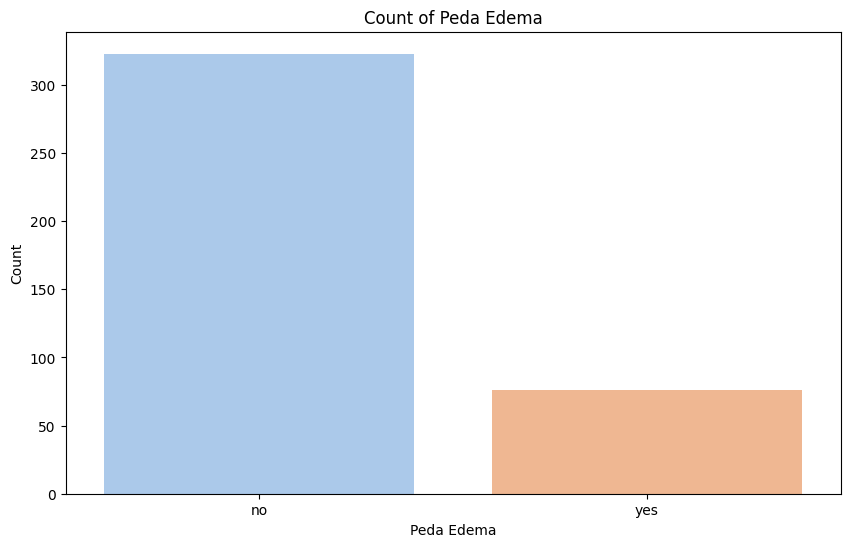

In [28]:
# Count of Count of Peda Edema

plt.figure(figsize=(10,6))
sns.countplot(x='peda_edema', data=df, palette='pastel')
plt.title("Count of Peda Edema")
plt.xlabel('Peda Edema')
plt.ylabel('Count')
plt.show()

insights >> around 60-70 people has Peda Edema

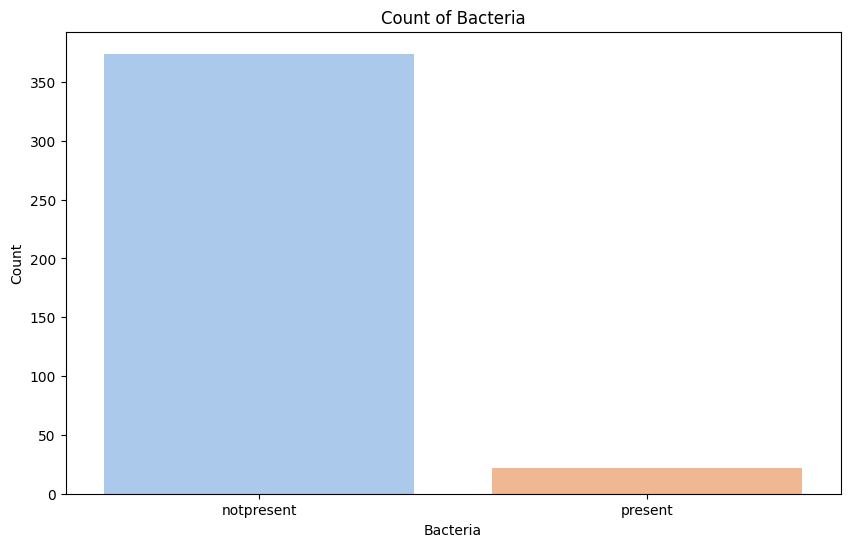

In [29]:
# Count of Count of Bacteria

plt.figure(figsize=(10,6))
sns.countplot(x='bacteria', data=df, palette='pastel')
plt.title("Count of Bacteria")
plt.xlabel('Bacteria')
plt.ylabel('Count')
plt.show()

insights >> Bacteria is present in around 10-20 people 

# Bivariate analysis

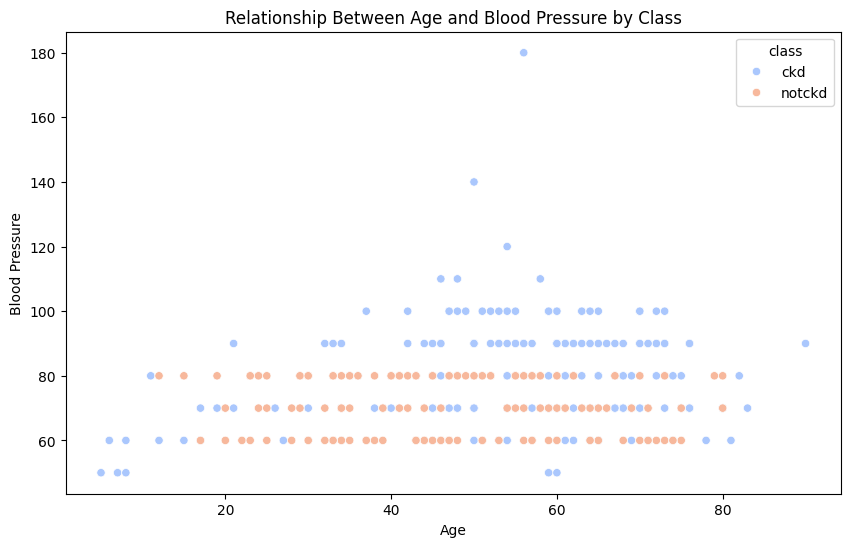

In [30]:
# Relationship Between Age and Blood Pressure by Class

plt.figure(figsize=(10,6))
sns.scatterplot(x= 'age', y= 'blood_pressure', data = df, hue = 'class', palette= 'coolwarm')
plt.title("Relationship Between Age and Blood Pressure by Class")
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()

insights >> As age is increasing bp is increasing   
people with high bp and age has high chances of ckd

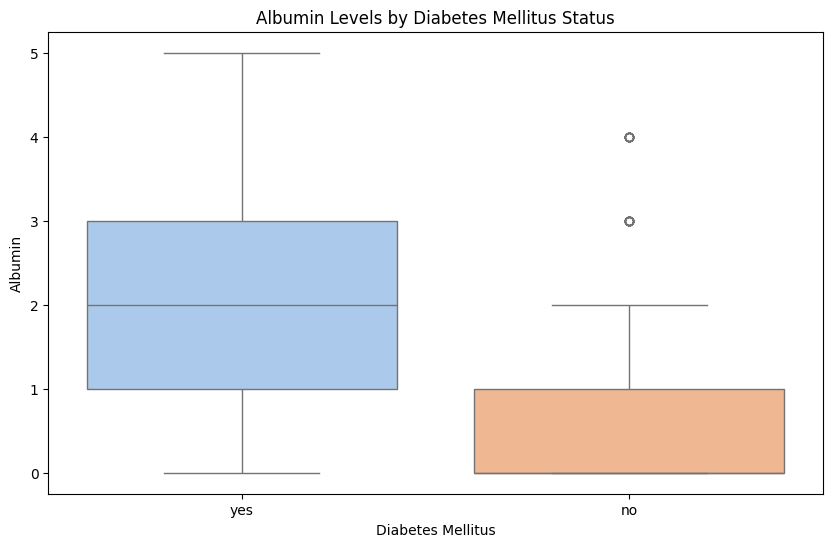

In [31]:
# Albumin Levels by Diabetes Mellitus Status

plt.figure(figsize=(10,6))
sns.boxplot(x = 'diabetes_mellitus', y= 'albumin', data = df, palette='pastel')
plt.title("Albumin Levels by Diabetes Mellitus Status")
plt.xlabel('Diabetes Mellitus')
plt.ylabel('Albumin')
plt.show()

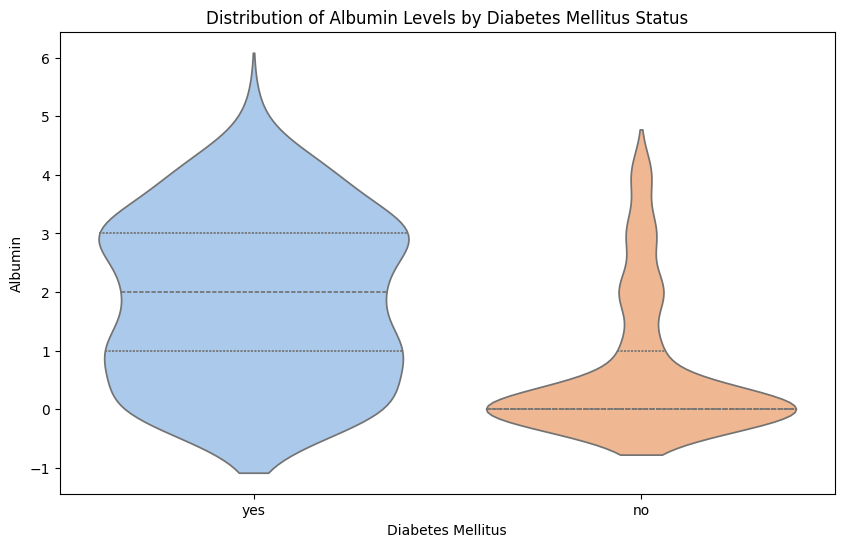

In [32]:
# Distribution of Albumin Levels by Diabetes Mellitus Status

plt.figure(figsize=(10,6))
sns.violinplot(x = 'diabetes_mellitus', y= 'albumin', data = df, inner= 'quartile', palette='pastel')
plt.title("Distribution of Albumin Levels by Diabetes Mellitus Status")
plt.xlabel('Diabetes Mellitus')
plt.ylabel('Albumin')
plt.show()

<Figure size 1000x600 with 0 Axes>

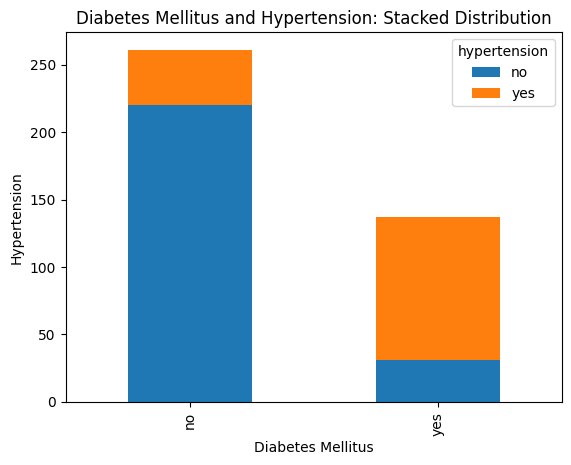

In [33]:
# Stacked bar chart

diabetes_hypertension = pd.crosstab(df['diabetes_mellitus'], df['hypertension'])

# Diabetes Mellitus and Hypertension: Stacked Distribution

plt.figure(figsize=(10,6))
diabetes_hypertension.plot(kind= 'bar', stacked = True)
plt.title("Diabetes Mellitus and Hypertension: Stacked Distribution")
plt.xlabel('Diabetes Mellitus')
plt.ylabel('Hypertension')
plt.show()

insights >> People with Diabetes has a high chances of also having Hypertension

# Multivariate Analysis

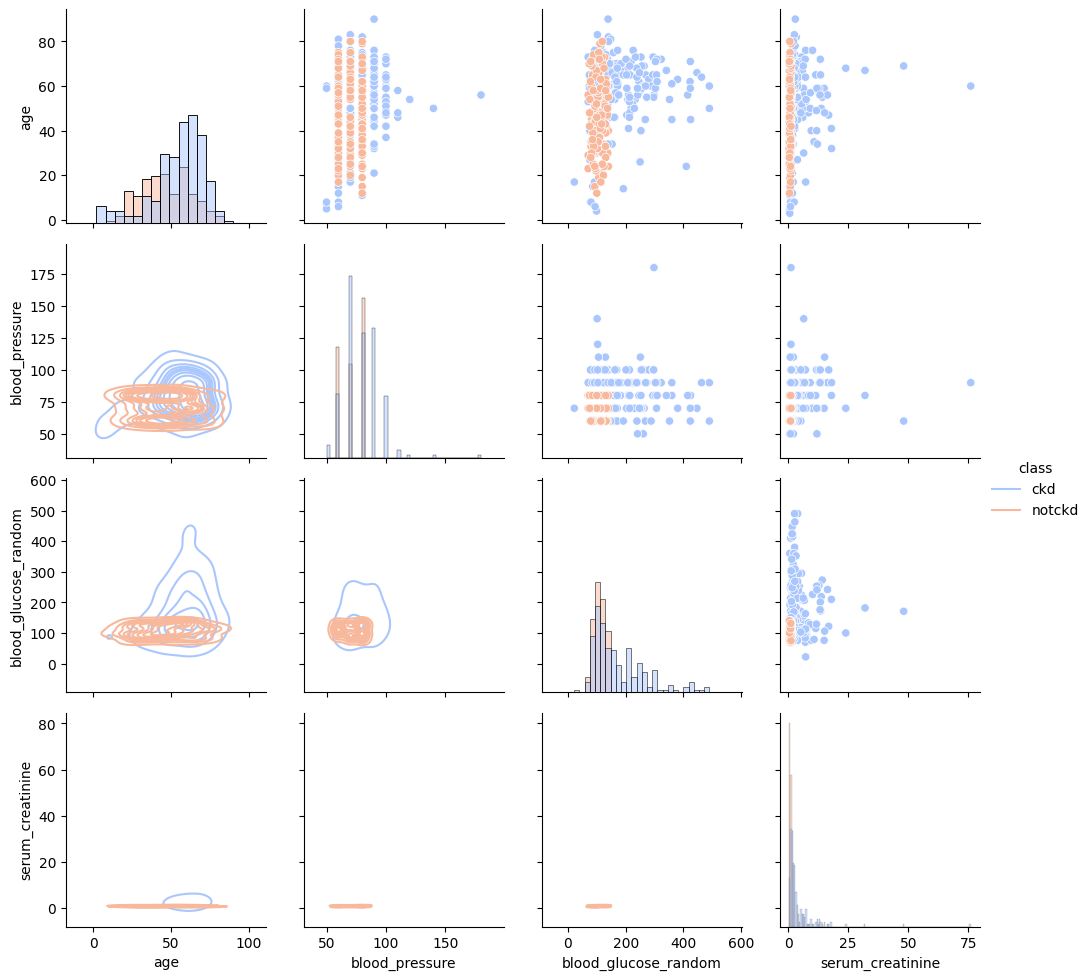

In [34]:
# PairGrid for selected columns

cols = ['age', 'blood_pressure', 'blood_glucose_random', 'serum_creatinine', 'class']

g = sns.PairGrid(df[cols], hue='class', palette = 'coolwarm')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, cmap = 'Blues_d')
g.map_diag(sns.histplot)
g.add_legend()
plt.show()

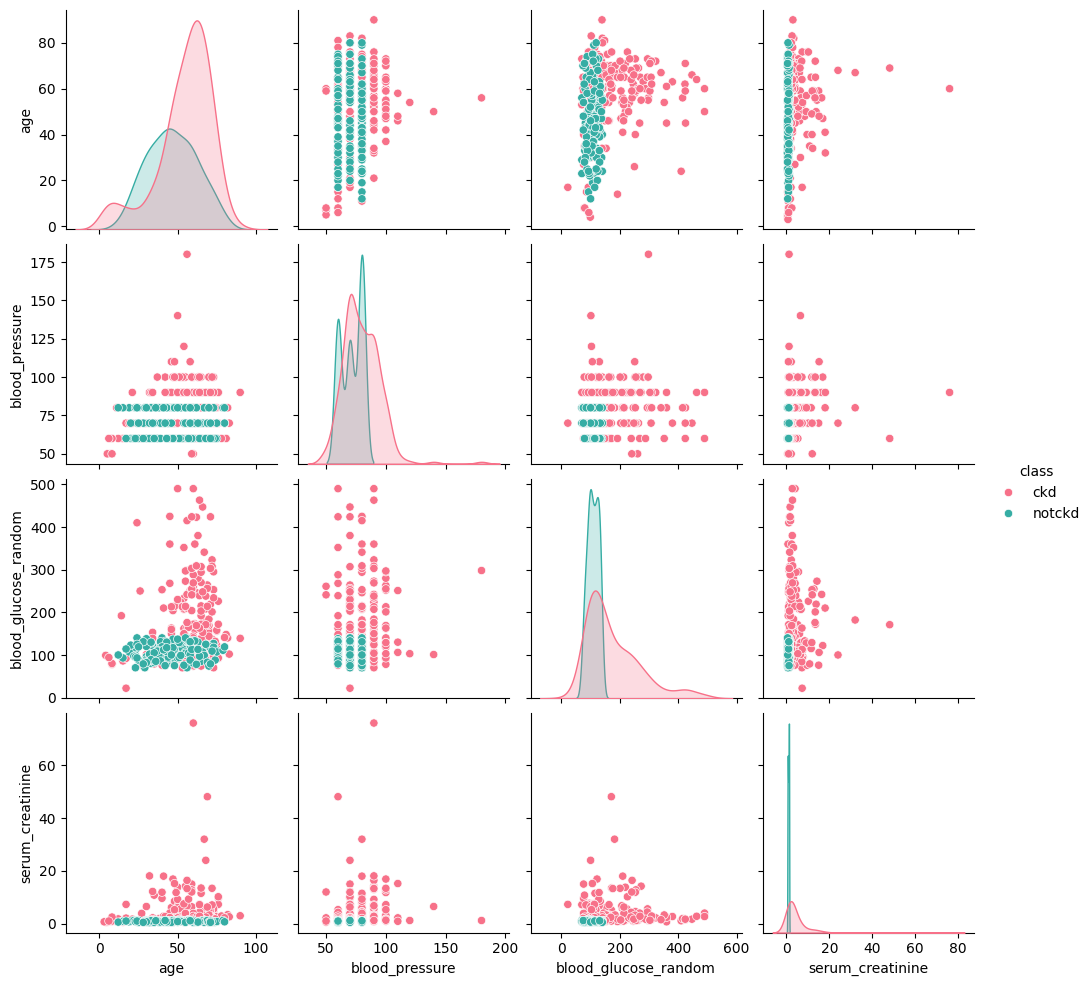

In [35]:
cols = ['age', 'blood_pressure', 'blood_glucose_random', 'serum_creatinine', 'class']
sns.pairplot(df[cols], hue = 'class', palette = 'husl')

In [36]:
df.corr(numeric_only=True)

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896
blood_pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
specific_gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448
blood_glucose_random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
blood_urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
serum_creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873
potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309


<Axes: >

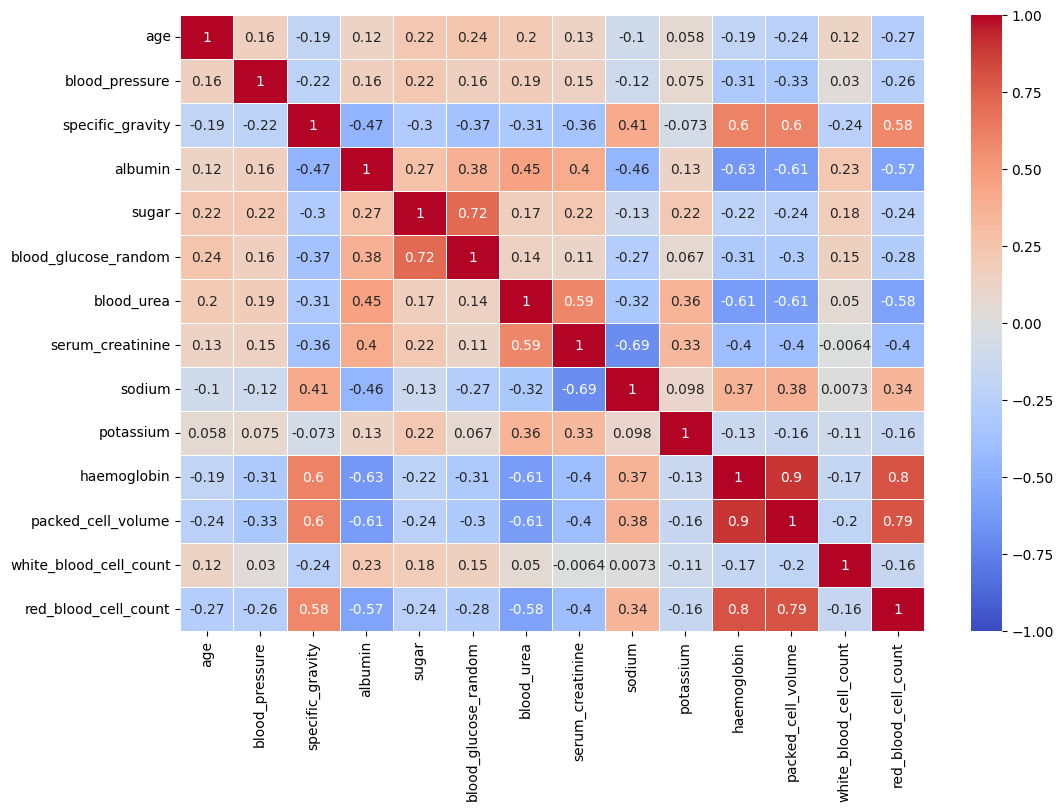

In [37]:
corr = df.corr(numeric_only=True)
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidth = .5, vmin=-1, vmax=1)

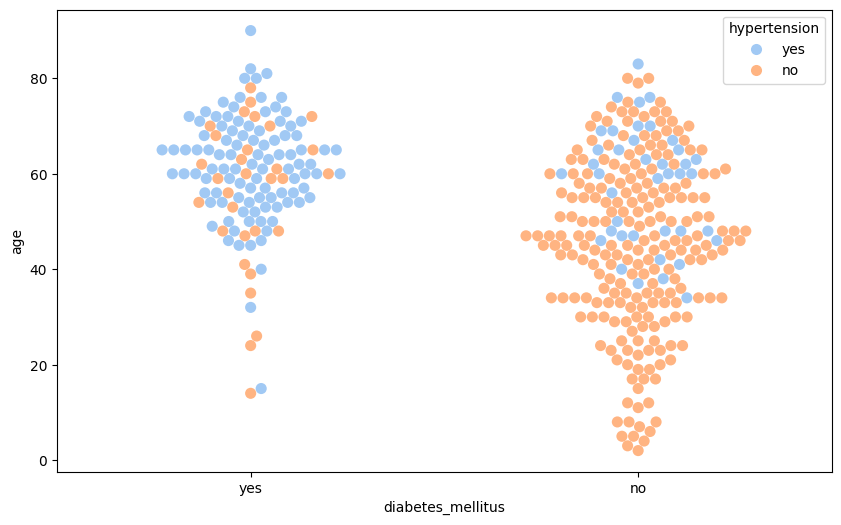

In [38]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='diabetes_mellitus', y='age', hue='hypertension', data=df, palette='pastel', size=8)
plt.show()

In [39]:
plt.figure(figsize=(10,6))
fig = px.scatter(df, x = 'age', y = 'blood_pressure', color = 'class', hover_data = ['serum_creatinine', 'haemoglobin'],title = "interactive scatterplot with hover information")
fig.show()

<Figure size 1000x600 with 0 Axes>

In [40]:
plt.figure(figsize=(10,6))
fig = px.scatter_3d(df, x = 'age', y = 'blood_pressure',z = 'serum_creatinine', color = 'class', title = "3d scatter plot scatterplot")
fig.show()

<Figure size 1000x600 with 0 Axes>

In [41]:
import plotly.graph_objects as go

data_corr = df.corr(numeric_only = True)
fig = go.Figure(data =go.Heatmap(z = data_corr.values,
                          x = data_corr.columns,
                          y=data_corr.index,
                          zmin=-1,
                          zmax=1))
fig.show()

In [42]:
fig = px.scatter_3d(df, x='age', y='blood_pressure', z='serum_creatinine', color='haemoglobin',
                    title='3D Scatter plot with Color Gradient')
fig.show()

# Handling missing values

In [43]:
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [44]:
print(f"cat_col = {cat_col}")
print(f"num_col = {num_col}")

cat_col = ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']
num_col = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


In [45]:
# Replace missing numerical values with median because outliers are present
median_values = df[num_col].median()
df[num_col] = df[num_col].fillna(median_values)

df[num_col].isna().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [46]:
# Replace missing categorical values with mode

mode_values = df[cat_col].mode().iloc[0]
df[cat_col] = df[cat_col].fillna(mode_values)

df[cat_col].isna().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [47]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                       object
dtype: object

In [48]:
## Converting objects column to int to train the machine learning models

In [49]:
# map class data 'ckd' to 0 and 'notckd' to 1 

df['class'] = df['class'].map({'ckd' : 0, 'notckd': 1})
df['class'].unique()

array([0, 1])

In [50]:
# data encoding
from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder()
for col in cat_col:
    df[col] = LabelEncoder.fit_transform(df[col])

In [51]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [52]:
# change dtypes of float columns to int where possible
float_col = ["age","blood_pressure","albumin","sugar","blood_glucose_random","blood_urea","sodium","packed_cell_volume","white_blood_cell_count"]
df[float_col] = df[float_col].astype('int')

In [53]:
# Check for duplicated rows
df.duplicated().sum()

np.int64(0)

# Feature Selection

In [54]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = df.columns

vif

,Feature
0,age
1,blood_pressure
2,specific_gravity
3,albumin
4,sugar
5,red_blood_cells
6,pus_cell
7,pus_cell_clumps
8,bacteria
9,blood_glucose_random


In [55]:
df.drop('specific_gravity', axis=1,inplace=True)

vif = pd.DataFrame()
vif['Feature'] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

vif

,Feature,VIF
0,age,13.459591
1,blood_pressure,37.038014
2,albumin,3.237418
3,sugar,2.123773
4,red_blood_cells,11.527893
5,pus_cell,10.859778
6,pus_cell_clumps,1.784163
7,bacteria,1.334732
8,blood_glucose_random,9.330434
9,blood_urea,5.621577


In [56]:
df.drop('sodium', axis=1,inplace=True)

vif = pd.DataFrame()
vif['Feature'] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

vif

,Feature,VIF
0,age,13.178793
1,blood_pressure,30.006459
2,albumin,3.205765
3,sugar,2.074247
4,red_blood_cells,11.401951
5,pus_cell,10.613643
6,pus_cell_clumps,1.779744
7,bacteria,1.333786
8,blood_glucose_random,9.168545
9,blood_urea,5.324339


In [57]:
df.drop('haemoglobin', axis=1,inplace=True)

vif = pd.DataFrame()
vif['Feature'] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

vif

,Feature,VIF
0,age,12.986409
1,blood_pressure,29.258724
2,albumin,3.194197
3,sugar,2.073430
4,red_blood_cells,11.362939
5,pus_cell,10.559743
6,pus_cell_clumps,1.776595
7,bacteria,1.330610
8,blood_glucose_random,9.132371
9,blood_urea,5.274597


In [58]:
df.drop('red_blood_cell_count', axis=1,inplace=True)

vif = pd.DataFrame()
vif['Feature'] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

vif

,Feature,VIF
0,age,12.886053
1,blood_pressure,27.001275
2,albumin,3.171033
3,sugar,2.055995
4,red_blood_cells,11.361166
5,pus_cell,10.258620
6,pus_cell_clumps,1.773427
7,bacteria,1.328980
8,blood_glucose_random,8.948031
9,blood_urea,5.274391


In [59]:
df.drop('packed_cell_volume', axis=1,inplace=True)

vif = pd.DataFrame()
vif['Feature'] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

vif

,Feature,VIF
0,age,12.498792
1,blood_pressure,21.061238
2,albumin,3.090811
3,sugar,2.021046
4,red_blood_cells,10.803243
5,pus_cell,9.456487
6,pus_cell_clumps,1.772733
7,bacteria,1.328978
8,blood_glucose_random,8.446863
9,blood_urea,5.244735


In [60]:
df.drop('blood_pressure', axis=1,inplace=True)

vif = pd.DataFrame()
vif['Feature'] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

vif

,Feature,VIF
0,age,11.533338
1,albumin,3.047867
2,sugar,2.006727
3,red_blood_cells,10.622150
4,pus_cell,8.741833
5,pus_cell_clumps,1.772401
6,bacteria,1.312979
7,blood_glucose_random,7.973357
8,blood_urea,5.219685
9,serum_creatinine,2.023976


In [61]:
df.drop('age', axis=1,inplace=True)

vif = pd.DataFrame()
vif['Feature'] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

vif

,Feature,VIF
0,albumin,3.046062
1,sugar,1.989946
2,red_blood_cells,10.464038
3,pus_cell,8.391961
4,pus_cell_clumps,1.736473
5,bacteria,1.310561
6,blood_glucose_random,7.643278
7,blood_urea,5.158024
8,serum_creatinine,2.023818
9,potassium,4.271545


In [62]:
df.drop('red_blood_cells', axis=1,inplace=True)

vif = pd.DataFrame()
vif['Feature'] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

vif

,Feature,VIF
0,albumin,2.963177
1,sugar,1.980277
2,pus_cell,6.617128
3,pus_cell_clumps,1.643301
4,bacteria,1.309932
5,blood_glucose_random,7.520726
6,blood_urea,5.130328
7,serum_creatinine,2.023803
8,potassium,3.988872
9,white_blood_cell_count,9.350354


In [63]:
df.head()

,albumin,sugar,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,potassium,white_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,1,0,1,0,0,121,36,1.2,4.4,7800,1,1,0,0,0,0,0
1,4,0,1,0,0,121,18,0.8,4.4,6000,0,0,0,0,0,0,0
2,2,3,1,0,0,423,53,1.8,4.4,7500,0,1,0,1,0,1,0
3,4,0,0,1,0,117,56,3.8,2.5,6700,1,0,0,1,1,1,0
4,2,0,1,0,0,106,26,1.4,4.4,7300,0,0,0,0,0,0,0


Save Cleaned data for Machine Learning model training

In [64]:
df.to_csv('cleaned_data.csv', index=False)